In [1]:
pip install chardet


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import chardet
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import chardet
with open(r'D:\jupyter Notebook\globalterrorismdb_0718dist.csv', 'rb') as file:
    raw_data = file.read()
    encoding = chardet.detect(raw_data)
    print(encoding)


In [ ]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='Windows-1252')

In [ ]:
data

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
data.describe()

In [ ]:
data.columns

In [178]:
df_cleaned = data.dropna(thresh=int(data.shape[0] * 0.7), axis=1)

In [141]:
df_cleaned

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [ ]:
df_cleaned.loc[df_cleaned.isna().any(axis=1)]

In [182]:
df_cleaned.shape

(181691, 47)

In [149]:
df_cleaned.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [151]:
data['latitude']=data['latitude'].fillna(data['latitude'].mode())

In [153]:
data['longitude']=data['longitude'].fillna(data['longitude'].mode())

In [155]:
data['nwound']=data['nwound'].fillna(data['nwound'].mean())

In [ ]:
df_cleaned.to_csv("cleaned_data.csv")

In [216]:
numeric_col=['iyear','imonth','iday']
for col in numeric_col:
    arr=np.array(data[col])
    print(f'{col} : {np.mean(arr)}')

iyear : 2002.6389969783863
imonth : 6.467276860163684
iday : 15.505644198116583


In [230]:
categorical_columns=['Country','Region','City','Attacktype','Targtype']
for col in numeric_col:
    arr=np.array(data[col])
    counts= np.bincount(arr)
    print(f'{col} : {np.argmax(counts)}')

iyear : 2014
imonth : 5
iday : 15


In [254]:
grouped_data_by_year=df_cleaned.groupby('iyear')

In [256]:
grouped_data_by_year.first()

,eventid,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
iyear,,,,,,,,,,,,,,,,,,,,,
1970,197000000001,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Federal,Santo Domingo,...,Unknown Explosive Type,1.0,0.000000,0,0.0,PGIS,0,0,0,0
1971,197101010001,1,1,0,217,United States,1,North America,North Carolina,Mount Gilead,...,Arson/Fire,0.0,0.000000,1,0.0,Hewitt Project,-9,-9,0,-9
1972,197200000001,5,25,0,156,Panama,2,Central America & Caribbean,Panama,Panama City,...,Time Fuse,0.0,0.000000,1,0.0,PGIS,-9,-9,1,1
1973,197300000001,0,0,1,45,Colombia,3,South America,Unknown,unknown,...,Unknown Gun Type,0.0,0.000000,0,1.0,PGIS,0,0,0,0
1974,197400000001,4,18,0,98,Italy,8,Western Europe,Liguria,Genoa,...,Dynamite/TNT,1.0,0.000000,0,0.0,PGIS,0,0,0,0
1975,197500000001,0,0,0,153,Pakistan,6,South Asia,Punjab,Rawalpindi,...,Unknown Explosive Type,0.0,3.167668,1,0.0,PGIS,-9,-9,0,-9
1976,197600000001,0,0,0,209,Turkey,10,Middle East & North Africa,Istanbul,Istanbul,...,Unknown Explosive Type,0.0,3.167668,1,0.0,Hyland,0,1,0,1
1977,197700000001,0,0,0,101,Japan,4,East Asia,Tokyo,Tokyo,...,Unknown Explosive Type,0.0,3.167668,1,0.0,PGIS,0,0,0,0
1978,197800000001,0,0,0,30,Brazil,3,South America,Rio Grande do Sul,Porto Alegre,...,Unknown Explosive Type,0.0,3.167668,0,0.0,PGIS,-9,-9,1,1


In [258]:
grouped_data_by_region=df_cleaned.groupby('region')
grouped_data_by_region.first()

,eventid,iyear,imonth,iday,extended,country,country_txt,region_txt,provstate,city,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
region,,,,,,,,,,,,,,,,,,,,,
1,197000000002,1970,0,0,0,130,Mexico,North America,Federal,Mexico city,...,Unknown Gun Type,0.0,0.000000,0,1.0,PGIS,0,1,1,1
2,197000000001,1970,7,2,0,58,Dominican Republic,Central America & Caribbean,Guatemala,Santo Domingo,...,Automatic or Semi-Automatic Rifle,1.0,0.000000,0,0.0,PGIS,0,0,0,0
3,197001020001,1970,1,2,0,218,Uruguay,South America,Montevideo,Montevideo,...,Automatic or Semi-Automatic Rifle,0.0,0.000000,0,0.0,PGIS,0,0,0,0
4,197001000003,1970,1,0,0,101,Japan,East Asia,Fukouka,Fukouka,...,Unknown Explosive Type,0.0,3.167668,1,0.0,PGIS,-9,-9,1,1
5,197001000001,1970,1,0,0,160,Philippines,Southeast Asia,Tarlac,Unknown,...,Vehicle,1.0,0.000000,0,0.0,PGIS,-9,-9,1,1
6,197011010001,1970,11,1,0,153,Pakistan,South Asia,Sindh,Karachi,...,Unknown Explosive Type,4.0,20.000000,0,0.0,PGIS,-9,-9,1,1
7,199108090024,1991,8,9,0,74,Georgia,Central Asia,Shida Kartli,Tbilisi,...,Automatic or Semi-Automatic Rifle,0.0,0.000000,0,1.0,PGIS,0,1,1,1
8,197001000002,1970,1,0,0,78,Greece,Western Europe,Attica,Athens,...,Unknown Explosive Type,0.0,3.167668,1,0.0,PGIS,-9,-9,1,1
9,197001100001,1970,1,10,0,499,East Germany (GDR),Eastern Europe,Berlin,Berlin,...,Unknown Explosive Type,0.0,3.167668,0,0.0,PGIS,0,1,1,1


In [260]:
grouped_data_by_attacktype=df_cleaned.groupby('attacktype1_txt')
grouped_data_by_attacktype.first()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
attacktype1_txt,,,,,,,,,,,,,,,,,,,,,
Armed Assault,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,...,Unknown Gun Type,0.0,0.000000,1,0.0,Hewitt Project,-9,-9,0,-9
Assassination,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Tarlac,...,Automatic or Semi-Automatic Rifle,1.0,0.000000,0,0.0,PGIS,0,0,0,0
Bombing/Explosion,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,0.0,3.167668,1,0.0,PGIS,-9,-9,1,1
Facility/Infrastructure Attack,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,Molotov Cocktail/Petrol Bomb,0.0,3.167668,1,0.0,PGIS,-9,-9,1,1
Hijacking,197001080001,1970,1,8,0,98,Italy,8,Western Europe,Lazio,...,Rifle/Shotgun (non-automatic),0.0,0.000000,0,0.0,Hijacking DB,-9,-9,1,1
Hostage Taking (Barricade Incident),197006090004,1970,6,9,1,102,Jordan,10,Middle East & North Africa,Amman,...,Automatic or Semi-Automatic Rifle,0.0,0.000000,1,1.0,PGIS,0,1,1,1
Hostage Taking (Kidnapping),197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,Automatic or Semi-Automatic Rifle,0.0,0.000000,0,1.0,PGIS,0,1,1,1
Unarmed Assault,197005220001,1970,5,22,0,217,United States,1,North America,New York,...,Blunt Object,0.0,3.000000,1,0.0,HSI,0,1,1,1
Unknown,197001110001,1970,1,11,0,65,Ethiopia,11,Sub-Saharan Africa,Unknown,...,Unknown Gun Type,1.0,0.000000,0,0.0,PGIS,0,1,1,1


In [269]:
country_counts = df_cleaned['country'].value_counts()
print("\nMost Affected Countries:")
print(country_counts)


Most Affected Countries:
country
95     24636
153    14368
4      12731
92     11960
45      8306
       ...  
422        1
226        1
428        1
7          1
10         1
Name: count, Length: 205, dtype: int64


In [267]:
region_counts = df_cleaned['region_txt'].value_counts()
print("Most Affected Regions:")
print(region_counts)

Most Affected Regions:
region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64


In [2]:
x=df_cleaned['iyear'].unique()
y=df_cleaned.groupby('iyear')['eventid'].count()
plt.figure(figsize=(12,6))
plt.plot(
    x,y,
    color='#020326',
    marker=".",

)

plt.title('Attacks Trend Over Year')
plt.show()

NameError: name 'df_cleaned' is not defined

In [ ]:
regions=df_cleaned['region_txt'].unique()
count_attacks=df_cleaned.groupby('region_txt')['eventid'].count()
plt.figure(figsize=(12,6))
plt.bar(regions,count_attacks,color='#020326')
plt.xticks(rotation=45)
plt.title('Count Attacks in each Region')
plt.show()

In [ ]:
plt.subplots(figsize=(12,6))
top=df_cleaned['country_txt'].value_counts()[:10].to_frame().reset_index()
top.columns= ['country_txt','Attacks_Count']
sb.barplot(x='country_txt',y='Attacks_Count', data= top, color='#020326')
plt.title('Affected Countries ')
plt.xticks(rotation=45)
plt.show()

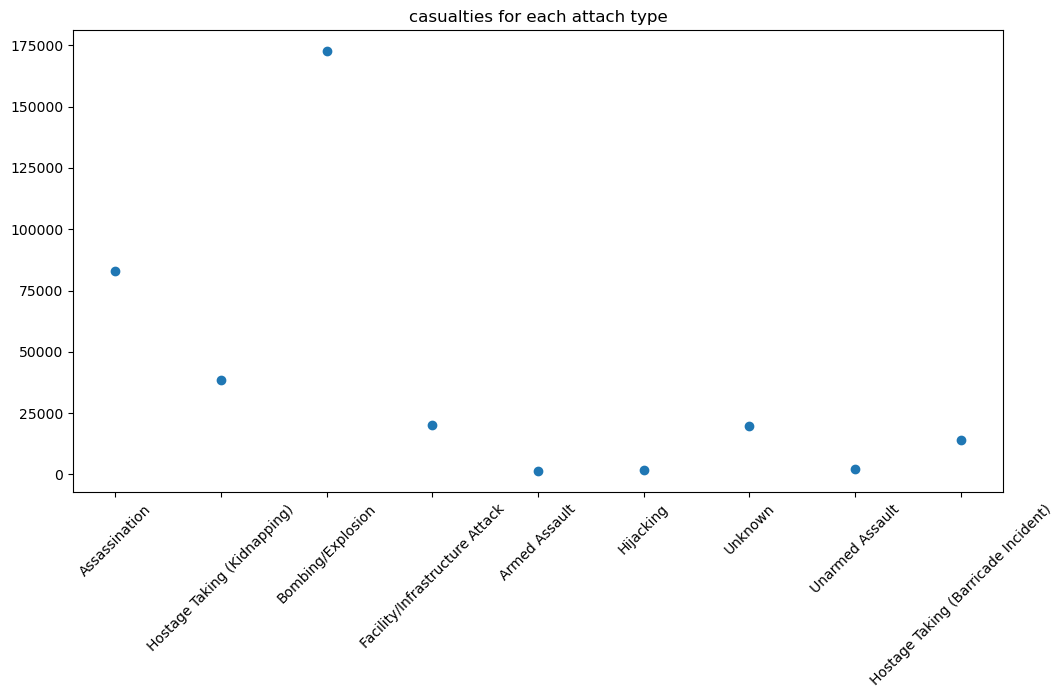

In [326]:
d=df_cleaned.groupby('attacktype1_txt')[['nkill','nwound']].count()
x=df_cleaned['attacktype1_txt'].unique()
y=d['nkill']+d['nwound']
plt.figure(figsize=(12,6))
plt.scatter(x,y)
plt.title('casualties for each attach type')
plt.xticks(rotation=45)
plt.show()